In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Loading the raw data into pandas
df = pd.read_csv('gold.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015/03/18,1148.699951,1174.300049,1147.000000,1151.400024,1151.400024,71
1,2015/03/19,1171.599976,1171.599976,1159.300049,1169.099976,1169.099976,112
2,2015/03/20,1171.000000,1185.400024,1171.000000,1184.800049,1184.800049,39
3,2015/03/23,1181.599976,1188.000000,1181.199951,1188.000000,1188.000000,54
4,2015/03/24,1188.000000,1193.000000,1186.000000,1191.699951,1191.699951,5
...,...,...,...,...,...,...,...
1254,2020/03/12,1633.099976,1651.000000,1560.400024,1642.300049,1642.300049,553457
1255,2020/03/13,1582.699951,1597.900024,1504.000000,1590.300049,1590.300049,524471
1256,2020/03/15,0.000000,0.000000,0.000000,1515.699951,1515.699951,0
1257,2020/03/16,1563.800049,1574.800049,1450.900024,1516.699951,1516.699951,535860


In [3]:
#Taking the date column and turning it to a datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-18,1148.699951,1174.300049,1147.000000,1151.400024,1151.400024,71
1,2015-03-19,1171.599976,1171.599976,1159.300049,1169.099976,1169.099976,112
2,2015-03-20,1171.000000,1185.400024,1171.000000,1184.800049,1184.800049,39
3,2015-03-23,1181.599976,1188.000000,1181.199951,1188.000000,1188.000000,54
4,2015-03-24,1188.000000,1193.000000,1186.000000,1191.699951,1191.699951,5


In [4]:
#The previous days close is shifted upso it becomes easier to calculate the price difference
df['Price1'] = df['Close'].shift(-1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price1
0,2015-03-18,1148.699951,1174.300049,1147.000000,1151.400024,1151.400024,71,1169.099976
1,2015-03-19,1171.599976,1171.599976,1159.300049,1169.099976,1169.099976,112,1184.800049
2,2015-03-20,1171.000000,1185.400024,1171.000000,1184.800049,1184.800049,39,1188.000000
3,2015-03-23,1181.599976,1188.000000,1181.199951,1188.000000,1188.000000,54,1191.699951
4,2015-03-24,1188.000000,1193.000000,1186.000000,1191.699951,1191.699951,5,1197.300049


In [5]:
#With the price difference we can calculate the return on a daily basis
df['PriceDiff'] = df['Price1'] - df['Close'] 
df['Return'] = df['PriceDiff']/df['Close']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return
0,2015-03-18,1148.699951,1174.300049,1147.000000,1151.400024,1151.400024,71,1169.099976,17.699952,0.015373
1,2015-03-19,1171.599976,1171.599976,1159.300049,1169.099976,1169.099976,112,1184.800049,15.700073,0.013429
2,2015-03-20,1171.000000,1185.400024,1171.000000,1184.800049,1184.800049,39,1188.000000,3.199951,0.002701
3,2015-03-23,1181.599976,1188.000000,1181.199951,1188.000000,1188.000000,54,1191.699951,3.699951,0.003114
4,2015-03-24,1188.000000,1193.000000,1186.000000,1191.699951,1191.699951,5,1197.300049,5.600098,0.004699


In [6]:
#The strategy indicators used are the 50 and 200 simple day moving average
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df

,Date,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,MA50,MA200
0,2015-03-18,1148.699951,1174.300049,1147.000000,1151.400024,1151.400024,71,1169.099976,17.699952,0.015373,NaN,NaN
1,2015-03-19,1171.599976,1171.599976,1159.300049,1169.099976,1169.099976,112,1184.800049,15.700073,0.013429,NaN,NaN
2,2015-03-20,1171.000000,1185.400024,1171.000000,1184.800049,1184.800049,39,1188.000000,3.199951,0.002701,NaN,NaN
3,2015-03-23,1181.599976,1188.000000,1181.199951,1188.000000,1188.000000,54,1191.699951,3.699951,0.003114,NaN,NaN
4,2015-03-24,1188.000000,1193.000000,1186.000000,1191.699951,1191.699951,5,1197.300049,5.600098,0.004699,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-03-12,1633.099976,1651.000000,1560.400024,1642.300049,1642.300049,553457,1590.300049,-52.000000,-0.031663,1596.894006,1502.416999
1255,2020-03-13,1582.699951,1597.900024,1504.000000,1590.300049,1590.300049,524471,1515.699951,-74.600098,-0.046909,1597.732007,1503.662499
1256,2020-03-15,0.000000,0.000000,0.000000,1515.699951,1515.699951,0,1516.699951,1.000000,0.000660,1597.198005,1504.617499
1257,2020-03-16,1563.800049,1574.800049,1450.900024,1516.699951,1516.699951,535860,1539.500000,22.800049,0.015033,1596.490005,1505.568999


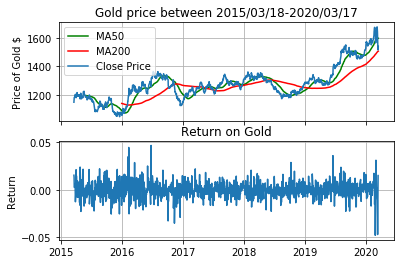

In [8]:
#Visualization of the closing price with the two simple moving averages
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,sharex=True)

ax1.plot(df['Date'],df['MA50'],color='g',label='MA50')
ax1.plot(df['Date'],df['MA200'],color='r',label='MA200')
ax1.plot(df['Date'],df['Close'],label='Close Price')
ax2.plot(df['Date'],df['Return'])

ax1.set_title('Gold price between 2015/03/18-2020/03/17')
ax1.set_ylabel('Price of Gold $')
ax1.legend()
ax1.grid()

ax2.set_title('Return on Gold')
ax2.set_ylabel('Return')

ax2.grid()
